<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/skillspire_introtostats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This week we are going to begin with the basics and explore populations, parameters, and estimates.  We are going to learn how to take an accurate sample from a population and compare it to other populations.

# Data Generation Processes

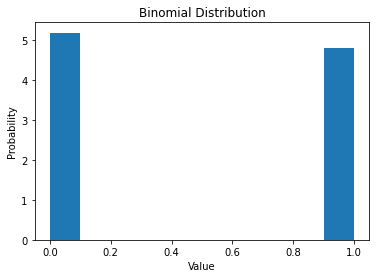

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import sqlite3
from ast import literal_eval

# !pip install ipython-sql

# Set the size of the binomial sample
n = 1000

# Generate a binomial sample
sample_binomial = np.random.binomial(1, .5, n)

# Plot a histogram of the sample
plt.hist(sample_binomial, density=True)

# Label the plot
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

In [ ]:
sample_binomial.mean()

0.481

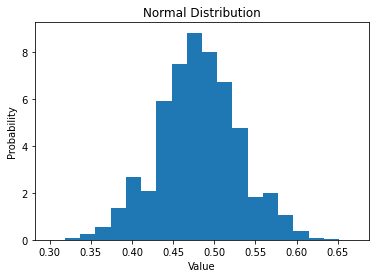

In [ ]:
# Generate a sample mean of the binomial sample 1000 times
sample_means = [np.mean(np.random.choice(sample_binomial, 100)) for _ in range(10000)]

# Plot a histogram of the sample
plt.hist(sample_means, density=True, bins=20)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

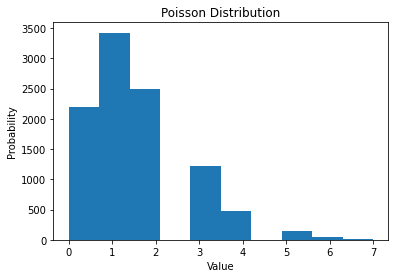

In [ ]:
# Poisson Example

# Set the number of samples
n = 10000

# Set the lambda parameter
lam = 1.5

# Generate a poisson sample
sample_poisson = np.random.poisson(lam, n)

# Plot a histogram of the sample
plt.hist(sample_poisson)

# Label the plot
plt.title('Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

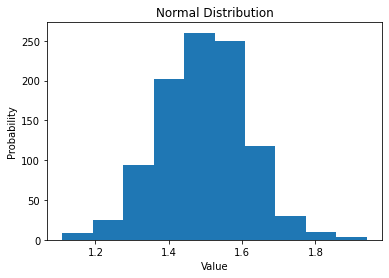

In [ ]:
# Generate a sample mean of the poisson sample 1000 times
sample_means = [np.mean(np.random.choice(sample_poisson, 100)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

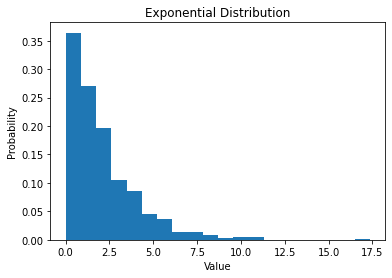

In [ ]:
# Exponentail Distributions

# Set the number of samples
n = 1000

# Set the rate parameter
rate = 0.5

# Generate an exponential sample
sample_exponential = np.random.exponential(1/rate, n)

# Plot a histogram of the sample
plt.hist(sample_exponential, density=True, bins=20)

# Label the plot
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

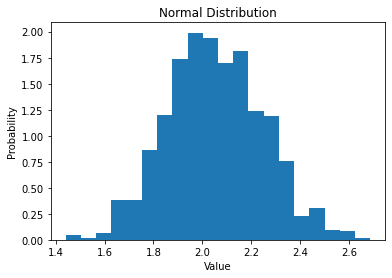

In [ ]:
# Generate a sample mean of the exponential sample 1000 times
sample_means = [np.mean(np.random.choice(sample_exponential, 100)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means, density=True, bins=20)

# Label the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

Let's discuss the common distributions we see in the data we work with every day.  How does the data generation process impact how you would analyze this data ? Is mean the appropriate model ? 

Text(0.5, 1.0, 'Normal Distribution')

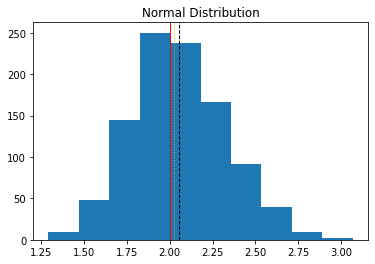

In [ ]:
# Generate a sample mean of the exponential sample 1000 times
sample_means = [np.mean(np.random.choice(sample_exponential, 50)) for _ in range(1000)]

# Plot a histogram of the sample
plt.hist(sample_means)

# Add vertical lines to mark the mean, median and rate parameter
plt.axvline(np.mean(sample_means), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(sample_means), color='y', linestyle='dotted', linewidth=1)
plt.axvline(1/rate, color='r', linestyle='solid', linewidth=1)

# Label the plot
plt.title('Normal Distribution')

Sample Mean: 0.51
Theoretical Mean: 0.5


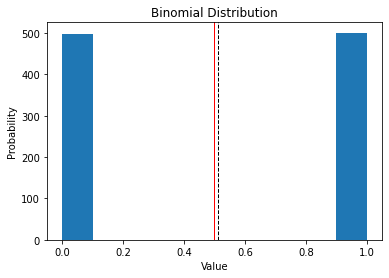

In [ ]:

# Set the number of samples
n = 1000

# Set the probability of success
p = 0.5

# Generate a binomial sample
sample_binomial = np.random.binomial(1, p, n)

# Calculate the sample mean
sample_mean = np.mean(np.random.choice(sample_binomial, 100))

# Calculate the theoretical mean
theoretical_mean = p

# Print the results
print('Sample Mean:', sample_mean)
print('Theoretical Mean:', theoretical_mean)

# Plot a histogram of the sample
plt.hist(sample_binomial)

# Add vertical lines to mark the sample mean and theoretical mean
plt.axvline(sample_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(theoretical_mean, color='r', linestyle='solid', linewidth=1)

# Label the plot
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

# Show the plot
plt.show()

# Customer Data
Now lets think about how some of our customer data is generated.
What are the various types of data present?  How does that change the type of model you use to evaluate a population?

In [ ]:
# customer data
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/customers.csv'
customer_df = pd.read_csv(url, index_col=0)

# transactiondata
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/transactions.csv'
transaction_df = pd.read_csv(url, index_col=0)

# product data
url = 'https://raw.githubusercontent.com/SSSpock/skillspire/main/products.csv'
product_df = pd.read_csv(url, index_col=0)

# Univariate and Bivariate Analysis

In this section, we will cover the basics of univariate and bivariate analysis. Univariate analysis is the analysis of a single variable, while bivariate analysis is the analysis of two variables to understand their relationship. We will go through a brief explanation of each, followed by coded examples demonstrating key principles.

# Measures of Variance and Standard Deviation
Measures of variance, such as standard deviation, describe the spread or dispersion of data within a distribution. In a normal distribution, standard deviation plays a crucial role in determining the proportion of values that lie within specific ranges.

The normal distribution, also known as the Gaussian distribution, is a bell-shaped curve that is symmetrical around the mean. In a normal distribution, the mean, median, and mode are equal. The standard deviation (σ) determines the spread of the distribution.

For a normal distribution:

About 68% of the values lie within one standard deviation (±1σ) from the mean (μ).
About 95% of the values lie within two standard deviations (±2σ) from the mean (μ).
About 99.7% of the values lie within three standard deviations (±3σ) from the mean (μ).
Let's visualize this relationship through a coding example.

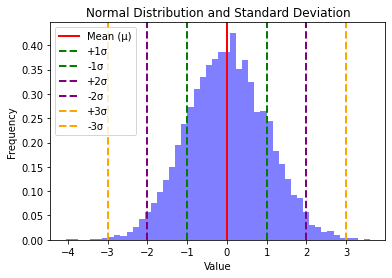

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a normal distribution with a mean and standard deviation
mean = 0
std_dev = 1
num_samples = 10000
data = np.random.normal(mean, std_dev, num_samples)

# Plot the histogram and add vertical lines for standard deviations
plt.hist(data, bins=50, alpha=0.5, color='blue', density=True)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label='Mean (μ)')
plt.axvline(mean + std_dev, color='green', linestyle='--', linewidth=2, label='+1σ')
plt.axvline(mean - std_dev, color='green', linestyle='--', linewidth=2, label='-1σ')
plt.axvline(mean + 2 * std_dev, color='purple', linestyle='--', linewidth=2, label='+2σ')
plt.axvline(mean - 2 * std_dev, color='purple', linestyle='--', linewidth=2, label='-2σ')
plt.axvline(mean + 3 * std_dev, color='orange', linestyle='--', linewidth=2, label='+3σ')
plt.axvline(mean - 3 * std_dev, color='orange', linestyle='--', linewidth=2, label='-3σ')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution and Standard Deviation')
plt.show()


In this example, we generated a normal distribution with a mean of 0 and a standard deviation of 1. The vertical lines show the mean and standard deviations from the mean. As expected, most of the values are concentrated within the first standard deviation (±1σ) from the mean.

Understanding the relationship between standard deviation and the normal distribution is crucial for interpreting and analyzing data. It allows us to estimate the probability of certain values occurring and helps in making informed decisions based on the distribution of the data.





# Univariate Analysis
Univariate analysis involves examining a single variable to understand its distribution, central tendency, and dispersion. Some common techniques used in univariate analysis include histograms, box plots, and probability density functions.

Let's create a histogram and a box plot for a dataset using Python

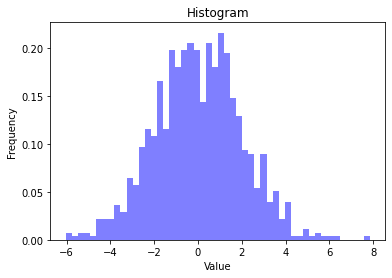

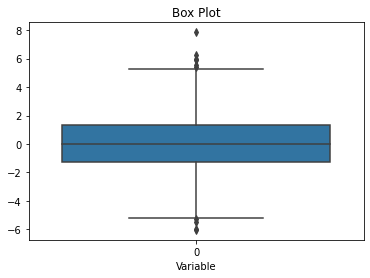

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate a normal distribution
mu = 0
sigma = 2
num_samples = 1000
data = np.random.normal(mu, sigma, num_samples)

# Plot a histogram
plt.hist(data, bins=50, alpha=0.5, color='blue', density=True)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot
sns.boxplot(data)
plt.title('Box Plot')
plt.xlabel('Variable')
plt.show()


# Percentiles and Binning Methods for Skewed Data
When data is skewed, it is not symmetrically distributed around the mean, and standard measures of central tendency such as the mean or standard deviation might not accurately describe the data. In these cases, percentiles and binning methods can be helpful for quantifying and analyzing skewed data.

Percentiles
Percentiles are a measure of relative standing that indicates the percentage of data points below a specific value. For example, the 25th percentile (also known as the first quartile) is the value below which 25% of the data points fall. Percentiles are particularly useful for understanding the distribution of skewed data, as they are less sensitive to extreme values.

To calculate percentiles in Python, we can use the numpy.percentile() function:

In [13]:
import numpy as np

# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Calculate percentiles
p25 = np.percentile(data, 25)
p50 = np.percentile(data, 50)
p75 = np.percentile(data, 75)

print(f'25th percentile: {p25:.2f}')
print(f'50th percentile (median): {p50:.2f}')
print(f'75th percentile: {p75:.2f}')


25th percentile: 0.29
50th percentile (median): 0.70
75th percentile: 1.42


# Binning Methods
Binning methods involve dividing the data into intervals (bins) and counting the number of data points that fall into each bin. This helps to visualize and analyze the distribution of skewed data.

Histograms and box plots are two common binning methods for skewed data:

Histogram: A histogram is a bar chart that represents the frequency distribution of a dataset. The data is divided into a set of intervals (bins), and the height of each bar corresponds to the number of data points within that interval.

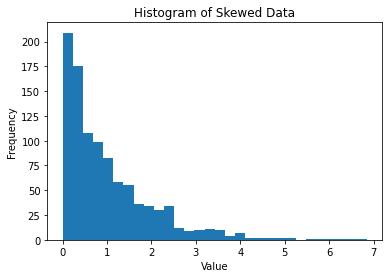

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Create a histogram
plt.hist(data, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Skewed Data')
plt.show()


# Box Plot: 
A box plot is a graphical representation of the distribution of a dataset based on quartiles. It displays the median, first quartile (Q1), and third quartile (Q3) as a box, with whiskers extending to the minimum and maximum values within 1.5 times the interquartile range (IQR). Outliers are represented as individual points outside the whiskers.

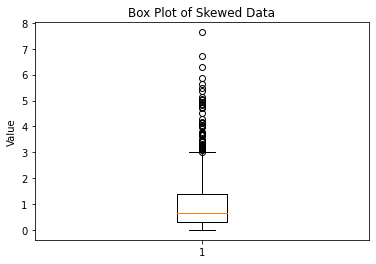

In [15]:
# Generate skewed data
data = np.random.exponential(scale=1, size=1000)

# Create a box plot
plt.boxplot(data)
plt.ylabel('Value')
plt.title('Box Plot of Skewed Data')
plt.show()


By using percentiles and binning methods like histograms and box plots, you can effectively analyze and quantify skewed data, providing better insights into the underlying distribution and potential outliers.

# Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables. Some common techniques used in bivariate analysis include scatter plots, correlation coefficients, and cross-tabulation.

Let's create a scatter plot and compute the correlation coefficient for two variables using Python.

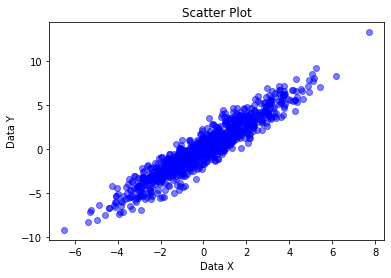

Correlation Coefficient: 0.95


In [2]:
# Generate two correlated datasets
np.random.seed(42)
data_x = np.random.normal(0, 2, 1000)
data_y = data_x * 1.5 + np.random.normal(0, 1, 1000)

# Plot a scatter plot
plt.scatter(data_x, data_y, alpha=0.5, color='blue')
plt.title('Scatter Plot')
plt.xlabel('Data X')
plt.ylabel('Data Y')
plt.show()

# Compute the correlation coefficient
correlation = np.corrcoef(data_x, data_y)[0, 1]
print(f'Correlation Coefficient: {correlation:.2f}')

In [5]:
# Create a sample dataset
data = {
    'Gender': ['M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M'],
    'Product': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B']
}

df = pd.DataFrame(data)

# Cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Product'])
print('Cross-tabulation:')
print(cross_tab)


Cross-tabulation:
Product  A  B
Gender       
F        3  2
M        2  3


In this section, you have learned about univariate and bivariate analysis. You should now be able to perform basic analyses on single variables as well as understand the relationships between two variables.

Question
Given two datasets data_a and data_b, write code to create a scatter plot, compute the correlation coefficient, and perform cross-tabulation if the data is categorical.

# Harmonic, Geometric, and Arithmetic Means
The harmonic, geometric, and arithmetic means are different ways of calculating the average of a set of numbers. Each mean is appropriate for different types of data or situations. Let's briefly describe each mean and then illustrate their differences through a coding example.

## Arithmetic Mean: 
The arithmetic mean is the most common type of mean. It is calculated by summing all the numbers in a dataset and dividing by the count of the numbers. The arithmetic mean is appropriate for situations where the data is evenly distributed and does not have extreme values.

## Geometric Mean: 
The geometric mean is calculated by multiplying all the numbers in a dataset and then taking the nth root, where n is the count of the numbers. The geometric mean is appropriate for situations where the data is not evenly distributed or has a multiplicative relationship, for example exponential distributions.

## Harmonic Mean: 
The harmonic mean is calculated by taking the reciprocal of the arithmetic mean of the reciprocals of the numbers in a dataset. The harmonic mean is appropriate for situations where the data has a harmonic or reciprocal relationship, such as rates or ratios.

Now, let's create a coding example to demonstrate the differences between harmonic, geometric, and arithmetic means.

In [8]:
import numpy as np
from scipy.stats import hmean, gmean

# Create a dataset
data = np.array([1, 2, 4, 8, 16, 32])
ratio = np.array([1/4, 1/2, 1/4, 1/6, 1/8])

# Calculate the arithmetic mean
arithmetic_mean = np.mean(data)
print(f'Arithmetic Mean: {arithmetic_mean:.2f}')

# Calculate the geometric mean
geometric_mean = gmean(data)
print(f'Geometric Mean: {geometric_mean:.2f}')

# Calculate the harmonic mean
harmonic_mean = hmean(data)
print(f'Harmonic Mean: {harmonic_mean:.2f}')


Arithmetic Mean: 10.50
Geometric Mean: 5.66
Harmonic Mean: 3.05


In this example, we used a dataset with an exponential growth pattern. As expected, the arithmetic mean is the largest, followed by the geometric mean, and finally the harmonic mean, which is the smallest. The geometric mean is a more appropriate measure of central tendency for this dataset due to its multiplicative relationship.

Remember to choose the appropriate mean based on the characteristics of your dataset and the relationships between the data points.

# Continuous vs. Discrete Data
Continuous and discrete data are two types of data that require different methods for summarization and analysis. Continuous data can take any value within a specific range, while discrete data can only take distinct or separate values. Using incorrect methods for summarization may lead to incorrect interpretations of the data. Let's explore these differences through examples.

Continuous Data
Continuous data can take any value within a range, and it often involves measurements or quantities, such as height, weight, or temperature. When analyzing continuous data, we typically use methods that account for the continuous nature of the data, such as histograms, probability density functions, and measures of central tendency like the mean or median.

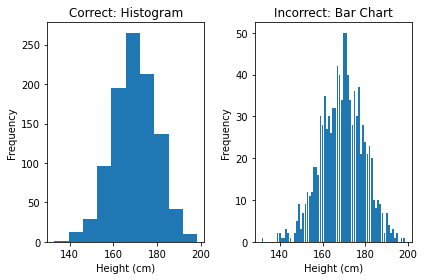

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate continuous data (heights in centimeters)
heights = np.random.normal(170, 10, 1000)

# Correct method: Using a histogram
plt.subplot(1, 2, 1)
plt.hist(heights, bins=10)
plt.title('Correct: Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Incorrect method: Using a bar chart
unique_heights, counts = np.unique(heights.astype(int), return_counts=True)
plt.subplot(1, 2, 2)
plt.bar(unique_heights, counts)
plt.title('Incorrect: Bar Chart')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In this example, using a histogram is the correct method for visualizing the continuous data (heights), while using a bar chart leads to an incorrect representation of the data.

Discrete Data
Discrete data can only take distinct or separate values, and it often involves counts or categories, such as the number of siblings or the type of pets owned. When analyzing discrete data, we typically use methods that account for the discrete nature of the data, such as bar charts, pie charts, and measures of central tendency like the mode.

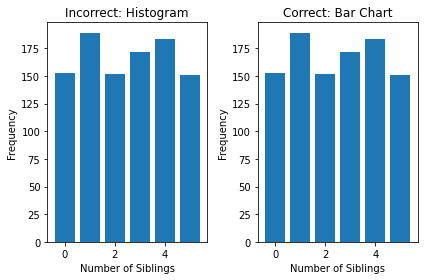

In [10]:
# Generate discrete data (number of siblings)
siblings = np.random.randint(0, 6, 1000)

# Incorrect method: Using a histogram
plt.subplot(1, 2, 1)
plt.hist(siblings, bins=np.arange(-0.5, 6.5, 1), rwidth=0.8)
plt.title('Incorrect: Histogram')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')

# Correct method: Using a bar chart
plt.subplot(1, 2, 2)
plt.bar(np.unique(siblings), np.bincount(siblings))
plt.title('Correct: Bar Chart')
plt.xlabel('Number of Siblings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Statistical Inference: Point Estimates and Confidence Intervals
Statistical inference is the process of drawing conclusions about a population based on a sample from that population. In this context, we often use point estimates and confidence intervals to make inferences about population parameters.

# Point Estimates
A point estimate is a single value that serves as our best guess for the true value of a population parameter. Common point estimates include the sample mean (for estimating the population mean) and the sample proportion (for estimating the population proportion).

However, point estimates are subject to sampling variance, which means that different samples from the same population might produce different point estimates. Sampling variance arises because a sample is only a subset of the population, and it might not perfectly represent the entire population.

# Confidence Intervals
To account for sampling variance, we use confidence intervals. A confidence interval is a range of values within which we believe the true population parameter is likely to fall, with a certain level of confidence. The level of confidence, often expressed as a percentage (e.g., 95%), represents the probability that the confidence interval will contain the population parameter if the sampling process were repeated many times.

A confidence interval consists of two parts:

The point estimate (e.g., sample mean or sample proportion)
The margin of error, which depends on the desired level of confidence and the sampling variability (usually represented by the standard error)
Calculating a confidence interval involves using the point estimate and adding/subtracting the margin of error. For example, for a 95% confidence interval for a population mean, we would calculate it as follows:

In [18]:
import numpy as np

# Generate a sample from a population
population = np.random.normal(50, 5, 10000)
sample = np.random.choice(population, size=100)

# Calculate the point estimate (sample mean)
point_estimate = np.mean(sample)

# Calculate the standard error
standard_error = np.std(sample, ddof=1) / np.sqrt(len(sample))

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
confidence_interval = (point_estimate - margin_of_error, point_estimate + margin_of_error)

print(f'Point Estimate: {point_estimate:.2f}')
print(f'95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})')


Point Estimate: 50.33
95% Confidence Interval: (49.37, 51.28)



In this example, we generated a sample from a population and calculated the point estimate (sample mean) and the 95% confidence interval for the population mean. The confidence interval provides a range of values that likely contains the true population mean with a 95% level of confidence.

Understanding the difference between point estimates and confidence intervals is crucial in statistical inference, as it allows you to make more informed decisions and account for sampling variance when drawing conclusions about a population based on a sample.

# Bootstrapped Confidence Intervals
Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly resampling from the original sample with replacement. Bootstrapped confidence intervals are an alternative to traditional parametric confidence intervals and can be particularly useful when the underlying distribution is not known or not normally distributed.

# Bootstrapped confidence intervals follow these steps:

Draw a random sample of size n from the original sample with replacement (called a bootstrap sample).
Calculate the statistic of interest (e.g., mean, median, proportion) for the bootstrap sample.
Repeat steps 1 and 2 a large number of times (e.g., 1000 or 10000) to generate a distribution of the statistic of interest.
Calculate the confidence interval based on the desired level of confidence (e.g., 95%) using the distribution of the statistic obtained in step 3.
Let's demonstrate how to create bootstrapped confidence intervals using Python

In [19]:
import numpy as np

def bootstrap(sample, statistic, num_iterations=1000, ci=95):
    """
    Calculate bootstrapped confidence interval for a given sample and statistic.
    
    Args:
        sample (array-like): The original sample data.
        statistic (function): The statistic function to apply on each bootstrap sample.
        num_iterations (int): The number of bootstrap iterations.
        ci (float): The desired confidence level (in percentage).

    Returns:
        tuple: Lower and upper bounds of the bootstrapped confidence interval.
    """
    bootstrap_samples = np.random.choice(sample, size=(num_iterations, len(sample)), replace=True)
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Generate a sample from a population
population = np.random.normal(50, 5, 10000)
sample = np.random.choice(population, size=100)

# Calculate bootstrapped 95% confidence interval for the mean
ci_lower, ci_upper = bootstrap(sample, np.mean, num_iterations=1000, ci=95)

print(f'Bootstrapped 95% Confidence Interval for the Mean: ({ci_lower:.2f}, {ci_upper:.2f})')


Bootstrapped 95% Confidence Interval for the Mean: (49.59, 51.34)


In this example, we generated a sample from a population and calculated a bootstrapped 95% confidence interval for the population mean. The bootstrap function takes the original sample, the statistic of interest, the number of bootstrap iterations, and the desired confidence level as input and returns the bootstrapped confidence interval.

Bootstrapped confidence intervals can be a powerful tool for statistical inference, especially when the underlying distribution is not known or not normally distributed, as they make fewer assumptions about the data and rely on the empirical distribution of the sample.

# Inferential Statistical Models

# Statistical Inference: Degree of Models/Assumptions
When performing statistical inference, we often have to make assumptions about the underlying distribution of the data or the relationships between variables. The degree of assumptions we make varies depending on the model or method we choose. In general, there are three classes of models based on their assumptions: fully parametric, non-parametric, and semi-parametric.

# Fully Parametric Models
Fully parametric models assume that the data follow a specific distribution, such as the normal distribution, and that the relationships between variables can be described by a set of parameters. Examples of fully parametric models include linear regression, logistic regression, and analysis of variance (ANOVA).

# Example: Linear Regression

In linear regression, we assume that the relationship between the response variable (Y) and the predictor variable(s) (X) can be described by a linear function, and that the errors are normally distributed with constant variance.

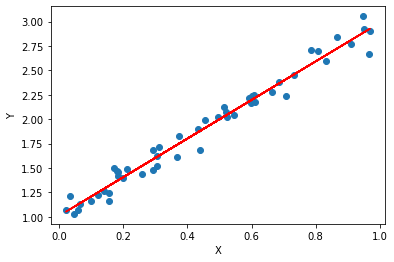

In [20]:
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50)
Y = 2 * X + 1 + np.random.normal(0, 0.1, 50)

# Fit a linear regression model
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

# Predict and plot
predictions = model.predict(X.reshape(-1, 1))
plt.scatter(X, Y)
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Non-Parametric Models
Non-parametric models do not make any assumptions about the underlying distribution of the data or the functional form of the relationships between variables. They are more flexible than parametric models and can adapt to a wide range of data patterns. Examples of non-parametric models include k-nearest neighbors, kernel density estimation, and decision trees.

# Example: k-Nearest Neighbors

In k-nearest neighbors (k-NN) classification, we predict the class of a new data point based on the majority class of its k-nearest neighbors in the training data.

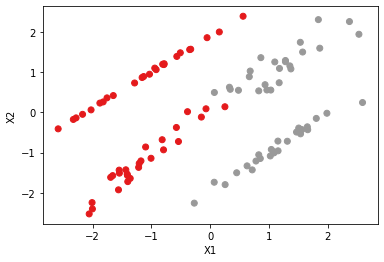

In [21]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict and plot
predictions = knn.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=plt.cm.Set1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Semi-Parametric Models
Semi-parametric models make some assumptions about the data or relationships between variables but are more flexible than fully parametric models. They combine parametric and non-parametric techniques to strike a balance between the simplicity of parametric models and the flexibility of non-parametric models. Examples of semi-parametric models include generalized additive models (GAMs) and Cox proportional hazards models.

# Example: Generalized Additive Model (GAM)

In generalized additive models, we assume that the relationship between the response variable (Y) and the predictor variable(s) (X) can be described by a sum of smooth functions, allowing for more flexibility than linear regression.

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


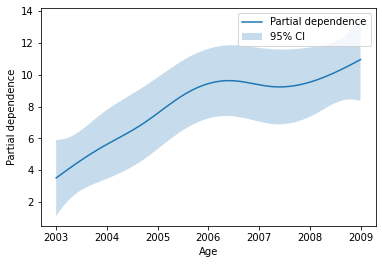

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM
from pygam.datasets import wage

# Load the wage dataset
X, y = wage()

# Fit a GAM with a spline term for the first predictor variable (age)
gam = LinearGAM(n_splines=10).gridsearch(X, y)

# Generate a grid of values for the predictor variable (age)
X_grid = gam.generate_X_grid(term=0)

# Calculate the partial dependence and confidence intervals
partial_dep, confidence_intervals = gam.partial_dependence(term=0, X=X_grid, width=0.95)

# Plot the partial dependence of the response variable on the first predictor variable
plt.figure()
plt.plot(X_grid[:, 0], partial_dep, label="Partial dependence")
plt.fill_between(X_grid[:, 0], confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.25, label="95% CI")
plt.xlabel('Age')
plt.ylabel('Partial dependence')
plt.legend()
plt.show()


In this example, we used the pygam library to fit a generalized additive model (GAM) to the wage dataset, which contains information about people's wages and their characteristics. We included a spline term for the first predictor variable, allowing for a flexible, smooth relationship between the response variable (wage) and the predictor variable. The plot shows the partial dependence of the wage on the first predictor variable.

In summary, fully parametric models make strong assumptions about the data and the relationships between variables, non-parametric models make few or no assumptions, and semi-parametric models strike a balance between the two. The choice of model depends on the specific problem, the data at hand, and the desired balance between simplicity and flexibility.